In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

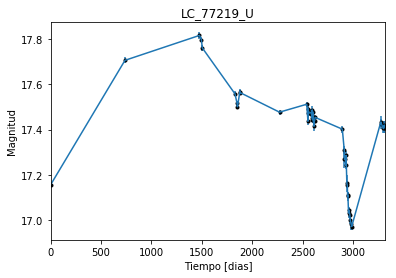

In [3]:
data = np.genfromtxt('LC_77219_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_77219_U')
plt.savefig("LC_77219_U.pdf")

In [4]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [5]:
%%capture capt
sample = model.run_mcmc(20000)

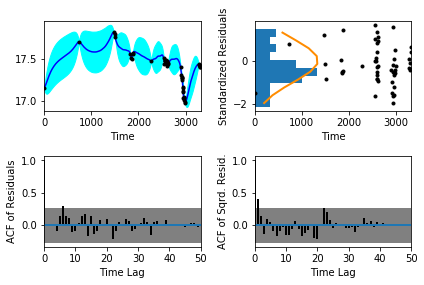

In [6]:
sample.assess_fit()

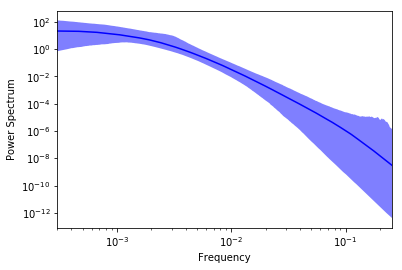

In [7]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [8]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

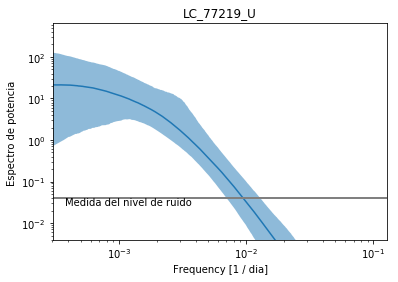

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_77219_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_77219_U')

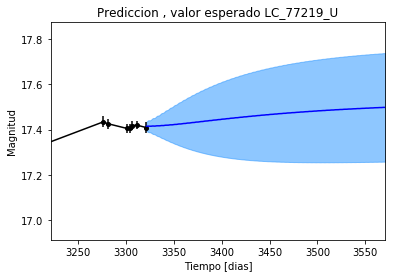

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_77219_U')

Text(0.5,1,'Prediccion, Caminos simulados LC_77219_U')

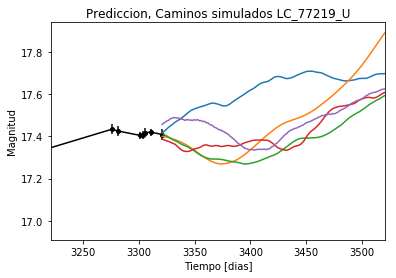

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados LC_77219_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


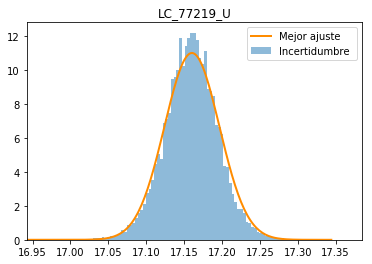

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_77219_U')
plt.savefig("Mejor_ajuste_LC_77219_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_77219_U')

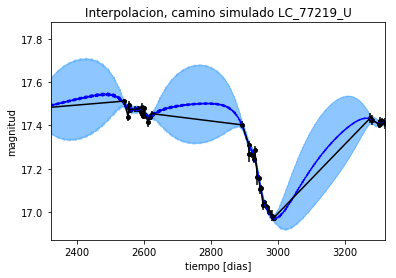

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_77219_U')

Text(0.5,1,'Interpolacion, camino simulado LC_77219_U')

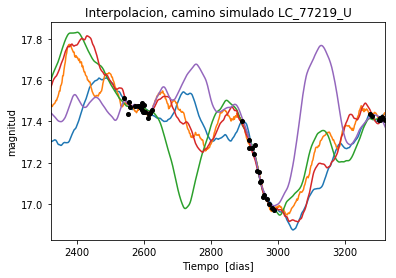

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_77219_U')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 606.931922165
Median: 0.0175666549027
Standard deviation: 0.117638780259
68% credibility interval: [ 0.00134384  0.17958565]
95% credibility interval: [  3.72954677e-04   4.31735115e-01]
99% credibility interval: [  3.18564910e-04   4.92341727e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 422.644744511
Median: 0.0019577665153
Standard deviation: 0.0415484100985
68% credibility interval: [ 0.00049526  0.01640708]
95% credibility interval: [ 0.00032669  0.14169091]
99% credibility interval: [ 0.00030588  0.26104672]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 1007.7090047
Median: 0.0135098790387
Standard deviation: 0

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1094.25501212
Median: 115.239858869
Standard deviation: 1.69379949906
68% credibility interval: [ 113.39779557  116.45374793]
95% credibility interval: [ 110.64150753  117.1991851 ]
99% credibility interval: [ 108.40578813  117.58578964]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 235.45155364
Median: 0.594062390015
Standard deviation: 1.10299103302
68% credibility interval: [ 0.08489249  2.19286836]
95% credibility interval: [ 0.02364905  3.79990112]
99% credibility interval: [ 0.01338868  5.08047861]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 1066.7735038
Median: 0.163160878731
Standard deviation: 1.97387656415
68% credibility interval: [ 0.01090862  1.9607943 ]
95% credibility interval: [  2.10236366e-03 

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1558.37436572
Median: 1.29821812353e-19
Standard deviation: 1.41281312523e+57
68% credibility interval: [  1.18446995e-54   6.96729191e+18]
95% credibility interval: [  5.75268245e-91   1.57880684e+44]
99% credibility interval: [  4.32359709e-97   5.42787299e+54]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 932.127305319
Median: 17.4834369525
Standard deviation: 0.113334088145
68% credibility interval: [ 17.38773639  17.57383777]
95% credibility interval: [ 17.23217046  17.71053552]
99% credibility interval: [ 17.12278658  17.8511165 ]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 580.822474828
Median: 0.000155115014016
Standard deviation: 0.116949973212
68% credibility interval: [ 0.          0.17901472]
95% credibility interval: [ 0.          0.41979126]
99% credibility interval: [ 0.          0.48646308]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 580.822474828
Median: 0.000155115014016
Standard deviation: 0.116949973212
68% credibility interval: [ 0.          0.17901472]
95% credibility interval: [ 0.          0.41979126]
99% credibility interval: [ 0.          0.48646308]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 930.620202615
Median: 0.0
Standard deviation: 0.000731764180411
68

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1094.25501212
Median: 115.239858869
Standard deviation: 1.69379949906
68% credibility interval: [ 113.39779557  116.45374793]
95% credibility interval: [ 110.64150753  117.1991851 ]
99% credibility interval: [ 108.40578813  117.58578964]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1052.23713649
Median: 0.0695619975993
Standard deviation: 0.0777589195925
68% credibility interval: [ 0.04246787  0.12518926]
95% credibility interval: [ 0.02864379  0.25020281]
99% credibility interval: [ 0.0236737   0.47335616]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1167.80617968
Median: 1.047981936
Standard deviation: 0.173505322542
68% credibility interval: [ 0.89108355  1.23238354]
95% credibility interval: [ 0.78166067  1.44936414]
99% credibility interval: [ 0.70612018  1.62736962]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 1075.51757227
Median: 0.000106509988531
Standard deviation: 0.00178296477351
68% credibility interval: [  3.68622693e-23   1.55084980e-03]
95% credibility interval: [  2.46811969e-48   6.10818182e-03]
99% credibility interval: [  1.08778918e-58   9.94098926e-03]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 606.931922165
Median: (-0.110374547981-1.73183744779j)
Standard deviation: 1.04225486313
68% credibility interval: [-1.12836994+0.j         -0.00844357-0.01290715j]
95% credibility interval: [ -2.71267173e+00+0.j          -2.34334335e-03-0.01864835j]
99% credibility interval: [ -3.09347431e+00+0.j          -2.00160236e-03-2.35861114j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 422.644744511
Median: (-0.0123010098038+0j)
Standard deviation: 0.779813077256
68% credibility interval: [-0.10308872+0.31326422j -0.00311179+0.j        ]
95% credibility interval: [-0.89027022+2.57632494j -0.00205264+3.05653766j]
99% credibility interval: [-1.64020492+3.11203478j -0.00192187+2.24502455j]
Posterior summary for parameter ar_r